In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import diffusion_model as dm

# Check generation of random Algebra-valued elements

In [2]:
randn_antihermitian_like = dm._lie_group_diffusion_process.randn_antihermitian_like
randn_traceless_antihermitian_like = dm._lie_group_diffusion_process.randn_traceless_antihermitian_like

In [3]:
def print_characteristics(x):
    
    print("Variance of real componets:")
    print(x.real.var(dim=0), "\n")

    print("Variance of imaginary componets:")
    print(x.imag.var(dim=0), "\n")

    print(r"Mean of diagonal of \( Tr X^\dagger X \):")
    print(torch.linalg.diagonal(x.adjoint() @ x).real.sum(dim=1).mean(dim=0))

In [4]:
n_c = 2
bsize = 1_000_000

x = randn_antihermitian_like(torch.zeros(bsize, n_c, n_c))
print_characteristics(x)

Variance of real componets:
tensor([[0.0000, 0.4996],
        [0.4996, 0.0000]]) 

Variance of imaginary componets:
tensor([[1.0015, 0.5006],
        [0.5006, 1.0003]]) 

Mean of diagonal of \( Tr X^\dagger X \):
tensor(4.0023)


In [5]:
n_c = 2
bsize = 1_000_000

x = randn_traceless_antihermitian_like(torch.zeros(bsize, n_c, n_c))
print_characteristics(x)

Variance of real componets:
tensor([[0.0000, 0.5009],
        [0.5009, 0.0000]]) 

Variance of imaginary componets:
tensor([[0.4993, 0.4998],
        [0.4998, 0.4993]]) 

Mean of diagonal of \( Tr X^\dagger X \):
tensor(3.0000)


In [6]:
n_c = 3
bsize = 1_000_000

x = randn_antihermitian_like(torch.zeros(bsize, n_c, n_c))
print_characteristics(x)

Variance of real componets:
tensor([[0.0000, 0.4994, 0.5010],
        [0.4994, 0.0000, 0.5002],
        [0.5010, 0.5002, 0.0000]]) 

Variance of imaginary componets:
tensor([[1.0001, 0.4996, 0.4996],
        [0.4996, 0.9988, 0.5003],
        [0.4996, 0.5003, 1.0001]]) 

Mean of diagonal of \( Tr X^\dagger X \):
tensor(8.9994)


In [7]:
n_c = 3
bsize = 1_000_000

x = randn_traceless_antihermitian_like(torch.zeros(bsize, n_c, n_c))
print_characteristics(x)

Variance of real componets:
tensor([[0.0000, 0.4989, 0.4999],
        [0.4989, 0.0000, 0.5002],
        [0.4999, 0.5002, 0.0000]]) 

Variance of imaginary componets:
tensor([[0.6678, 0.4996, 0.4991],
        [0.4996, 0.6669, 0.5003],
        [0.4991, 0.5003, 0.6676]]) 

Mean of diagonal of \( Tr X^\dagger X \):
tensor(7.9984)


# Check generation of random Group valued elements

In [8]:
def make_random_lie_group(n_c, bsize=10_000, n_steps=1_000, std=np.sqrt(2 * np.pi)):
    std = std / n_steps**0.5
    x = torch.zeros(bsize, n_c, n_c)
    x = randn_traceless_antihermitian_like(x)
    y = torch.matrix_exp(std * x)
    for _ in range(n_steps - 1):
        x = randn_traceless_antihermitian_like(x.real)
        y = torch.matrix_exp(std * x) @ y
    return y

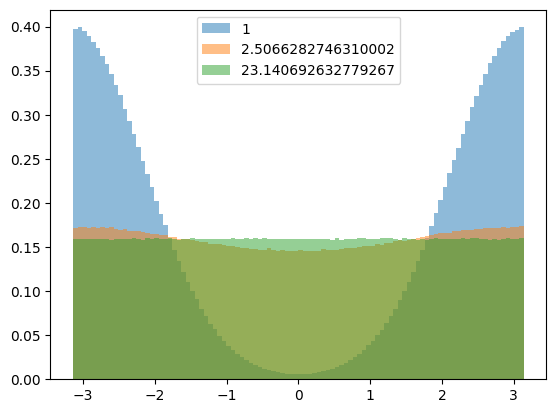

In [9]:
n_c = 1
bsize = 10_000_000

for std in [1, np.sqrt(2 * np.pi), np.exp(np.pi)]:
    theta = (std * torch.randn(bsize)) % (2 * np.pi) - np.pi
    plt.hist(theta, bins=100, density=True, label=std, alpha=0.5)

plt.legend();

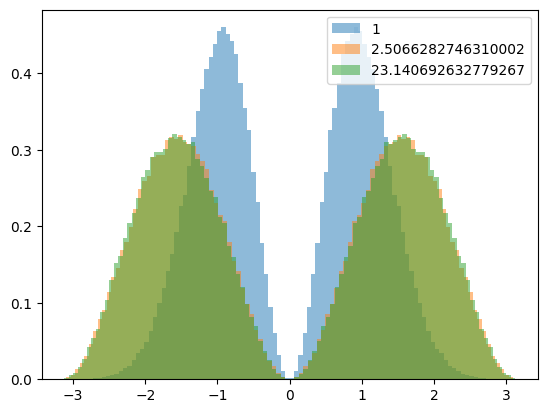

In [10]:
n_c = 2
bsize = 100_000

for std in [1, np.sqrt(2 * np.pi), np.exp(np.pi)]:
    y = make_random_lie_group(n_c=n_c, bsize=bsize, std=std)
    theta = torch.angle(torch.linalg.eig(y)[0]).ravel()
    plt.hist(theta, bins=100, density=True, label=std, alpha=0.5)

plt.legend();

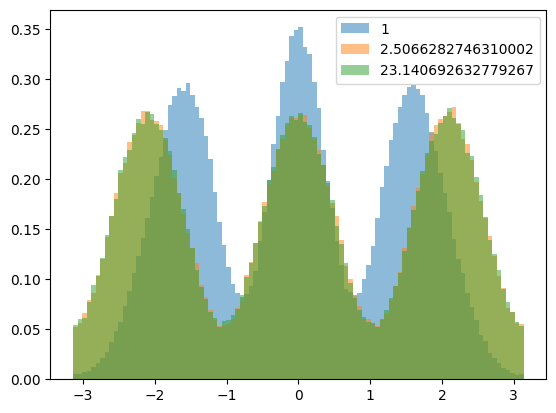

In [11]:
n_c = 3
bsize = 100_000

for std in [1, np.sqrt(2 * np.pi), np.exp(np.pi)]:
    y = make_random_lie_group(n_c=n_c, bsize=bsize, std=std)
    theta = torch.angle(torch.linalg.eig(y)[0]).ravel()
    plt.hist(theta, bins=100, density=True, label=std, alpha=0.5)

plt.legend();